# Suicide analysis by Gender and Age range 75+



## Import data and preprocessing

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import scipy.cluster.hierarchy as hac
from datetime import datetime
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

In [ ]:

#For Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#For Google Colab
path = "/content/drive/My Drive/Colab Notebooks/"
file1 = "57_countries.csv"
df = pd.read_csv(path+file1)

df.head()


country  year   sex  ... 35-54 years  55-74 years  75+ years
0  Argentina  1985  male  ...           0            0        202
1  Argentina  1985  male  ...           0          485          0
2  Argentina  1985  male  ...         414            0          0
3  Argentina  1985  male  ...           0            0          0
4  Argentina  1985  male  ...           0            0          0

[5 rows x 34 columns]

In [ ]:
ager = df["age"].unique()
ager.sort()
lst = [ager[3], ager[0], ager[1], ager[2], ager[4], ager[5]]
lst

['5-14 years',
 '15-24 years',
 '25-34 years',
 '35-54 years',
 '55-74 years',
 '75+ years']

In [ ]:
# #DIVISION OF DF BY AGE RANGE

df75 = df[df["age"] == lst[5]]
df75 = df75.reset_index(drop=True)

In [ ]:
male_df = df75[df75["sex"] == "male"]
male_df = male_df.reset_index(drop=True)
female_df = df75[df75["sex"] == "female"]
female_df = female_df.reset_index(drop=True)

In [ ]:
male_df

country  year   sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  male  ...           0            0        202
1     Argentina  1986  male  ...           0            0        230
2     Argentina  1987  male  ...           0            0        200
3     Argentina  1988  male  ...           0            0        216
4     Argentina  1989  male  ...           0            0        208
...         ...   ...   ...  ...         ...          ...        ...
1649    Uruguay  2010  male  ...           0            0         67
1650    Uruguay  2012  male  ...           0            0         65
1651    Uruguay  2013  male  ...           0            0         63
1652    Uruguay  2014  male  ...           0            0         55
1653    Uruguay  2015  male  ...           0            0         58

[1654 rows x 34 columns]

In [ ]:
print(len(male_df))
print(len(female_df))


1654
1654


In [ ]:
male_df.isnull().sum()


country                         0
year                            0
sex                             0
age                             0
suicides_no                     0
population                      0
suicides/100k pop               0
country-year                    0
 gdp_for_year ($)               0
gdp_per_capita ($)              0
generation                      0
Country-Age-sex                 0
Total_suicides                  0
Total_population                0
Max_Suicide                     0
Max_Population                  0
Min_suicides                    0
min_population                  0
Mean_suicides                   0
Mean_population                 0
GDP_percentage_growth           0
Population_percentage_growth    0
SPPI                            0
countrylabel                    0
sexlabel                        0
agelabel                        0
genlabels                       0
Country-Age-sex-range           0
5-14 years                      0
15-24 years   

In [ ]:
male_df = male_df.reset_index(drop=True)
female_df = female_df.reset_index(drop=True)



In [ ]:
female_df

country  year     sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  female  ...           0            0         41
1     Argentina  1986  female  ...           0            0         48
2     Argentina  1987  female  ...           0            0         57
3     Argentina  1988  female  ...           0            0         61
4     Argentina  1989  female  ...           0            0         65
...         ...   ...     ...  ...         ...          ...        ...
1649    Uruguay  2010  female  ...           0            0         14
1650    Uruguay  2012  female  ...           0            0         14
1651    Uruguay  2013  female  ...           0            0         23
1652    Uruguay  2014  female  ...           0            0         11
1653    Uruguay  2015  female  ...           0            0         17

[1654 rows x 34 columns]

In [ ]:
male_df.set_index('year', inplace = True)
male_df.sort_values(by = ['year', 'country'], inplace = True)
male_df.sort_index(inplace = True)
female_df.set_index('year', inplace = True)
female_df.sort_values(by = ['year', 'country'], inplace = True)
female_df.sort_index(inplace = True)


In [ ]:
male_df

country   sex        age  ...  35-54 years  55-74 years  75+ years
year                                ...                                     
1985    Argentina  male  75+ years  ...            0            0        202
1985    Australia  male  75+ years  ...            0            0         67
1985      Austria  male  75+ years  ...            0            0        152
1985     Barbados  male  75+ years  ...            0            0          1
1985      Belgium  male  75+ years  ...            0            0        214
...           ...   ...        ...  ...          ...          ...        ...
2016    Mauritius  male  75+ years  ...            0            0          3
2016  Netherlands  male  75+ years  ...            0            0        123
2016      Romania  male  75+ years  ...            0            0        171
2016       Sweden  male  75+ years  ...            0            0        100
2016     Thailand  male  75+ years  ...            0            0        152

[1654 rows x 33 columns]

In [ ]:
## Total No of Suicides
targets = male_df.columns[3:4]

country = male_df["country"].unique()
## Total No of Suicides
fetargets = female_df.columns[3:4]

fecountry = female_df["country"].unique()




In [ ]:
targets

Index(['suicides_no'], dtype='object')

### 1 A. Extract time series for each country

Men range 15-24 year Argentina 's suicides_no


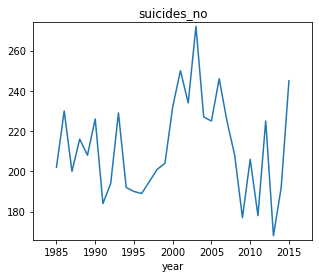

Men range 15-24 year Australia 's suicides_no


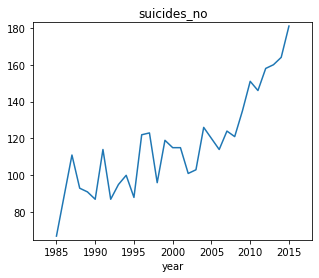

Men range 15-24 year Austria 's suicides_no


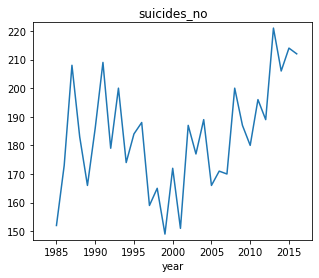

Men range 15-24 year Barbados 's suicides_no


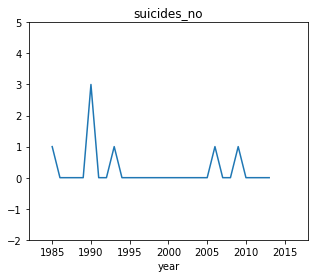

Men range 15-24 year Belgium 's suicides_no


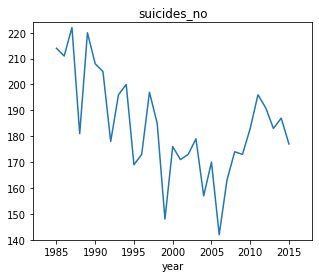

Men range 15-24 year Brazil 's suicides_no


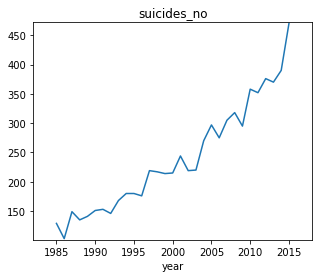

Men range 15-24 year Bulgaria 's suicides_no


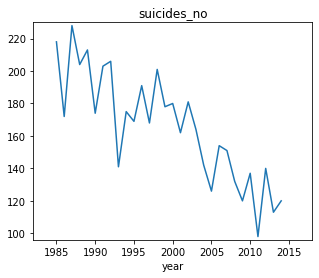

Men range 15-24 year Canada 's suicides_no


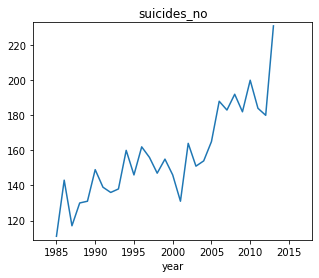

Men range 15-24 year Chile 's suicides_no


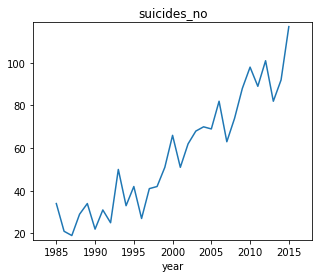

Men range 15-24 year Colombia 's suicides_no


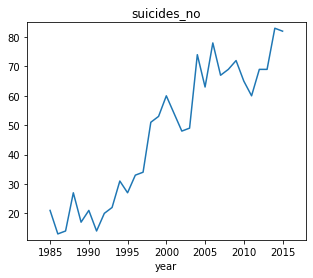

Men range 15-24 year Costa Rica 's suicides_no


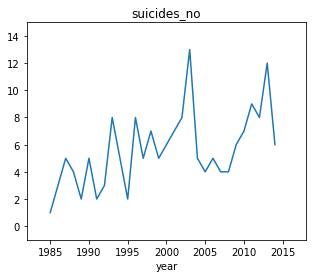

Men range 15-24 year Ecuador 's suicides_no


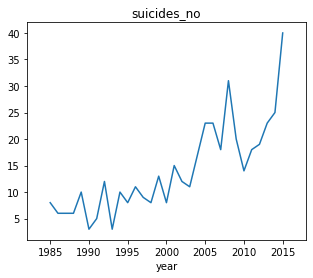

Men range 15-24 year France 's suicides_no


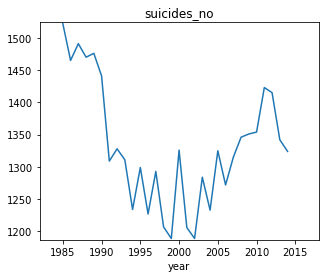

Men range 15-24 year Greece 's suicides_no


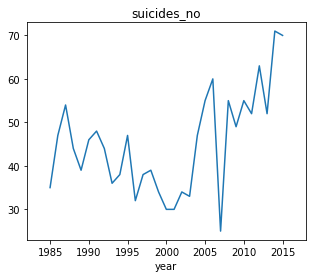

Men range 15-24 year Grenada 's suicides_no


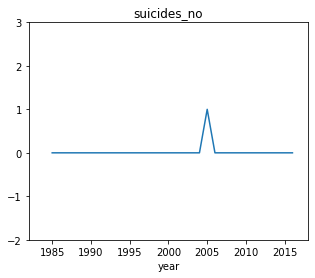

Men range 15-24 year Iceland 's suicides_no


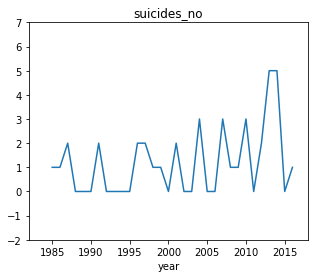

Men range 15-24 year Ireland 's suicides_no


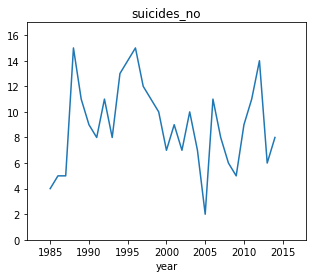

Men range 15-24 year Israel 's suicides_no


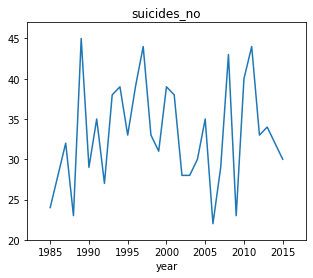

Men range 15-24 year Italy 's suicides_no


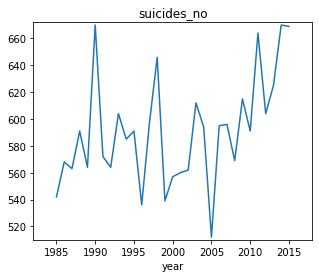

Men range 15-24 year Japan 's suicides_no


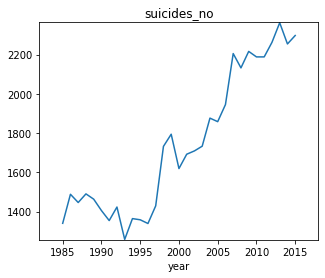

Men range 15-24 year Kuwait 's suicides_no


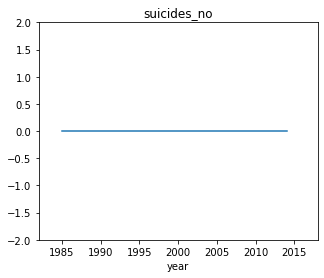

Men range 15-24 year Luxembourg 's suicides_no


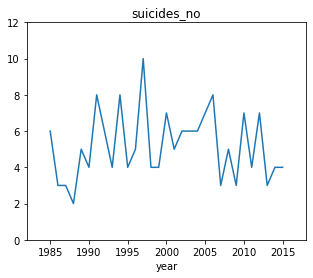

Men range 15-24 year Malta 's suicides_no


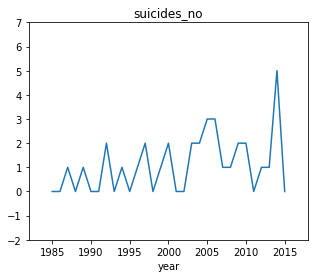

Men range 15-24 year Mauritius 's suicides_no


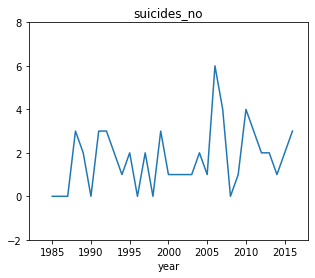

Men range 15-24 year Mexico 's suicides_no


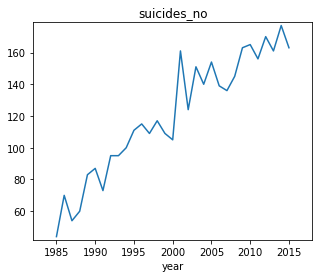

Men range 15-24 year Netherlands 's suicides_no


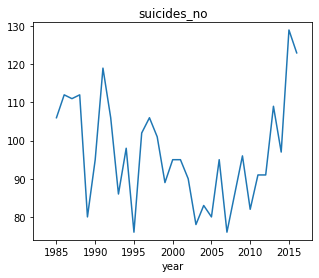

Men range 15-24 year New Zealand 's suicides_no


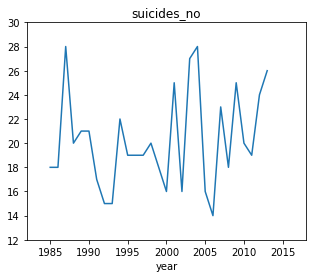

Men range 15-24 year Panama 's suicides_no


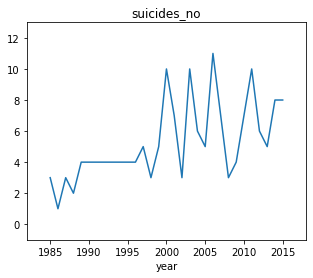

Men range 15-24 year Paraguay 's suicides_no


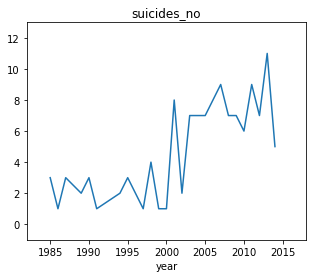

Men range 15-24 year Portugal 's suicides_no


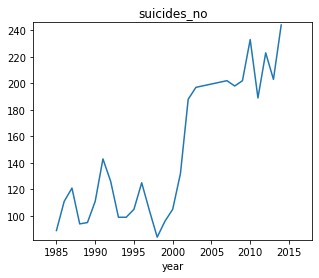

Men range 15-24 year Puerto Rico 's suicides_no


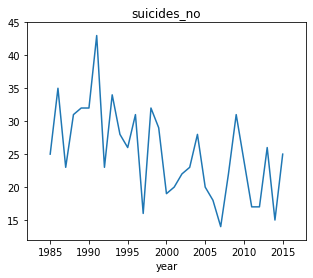

Men range 15-24 year Republic of Korea 's suicides_no


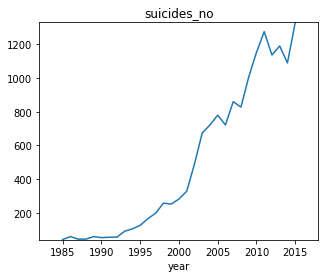

Men range 15-24 year Saint Vincent and Grenadines 's suicides_no


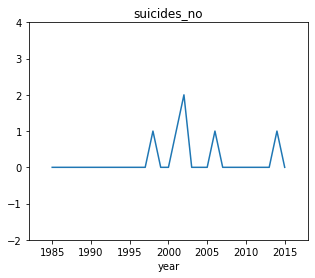

Men range 15-24 year Singapore 's suicides_no


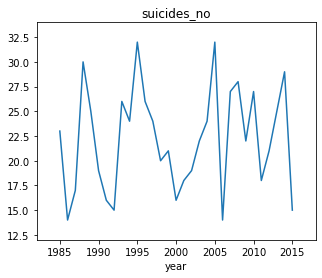

Men range 15-24 year Spain 's suicides_no


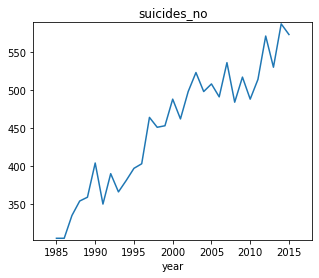

Men range 15-24 year Suriname 's suicides_no


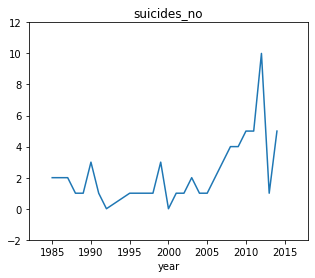

Men range 15-24 year Thailand 's suicides_no


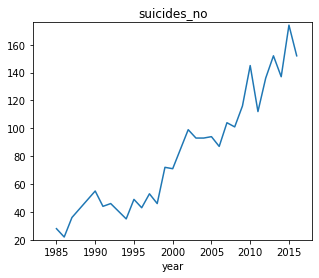

Men range 15-24 year Trinidad and Tobago 's suicides_no


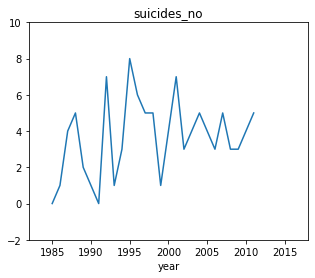

Men range 15-24 year United Kingdom 's suicides_no


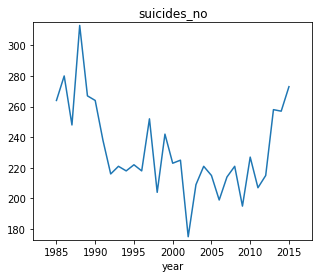

Men range 15-24 year United States 's suicides_no


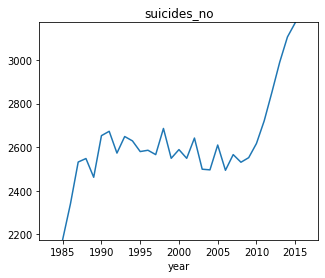

Men range 15-24 year Uruguay 's suicides_no


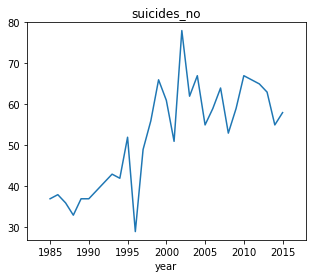

Men range 15-24 year Belize 's suicides_no


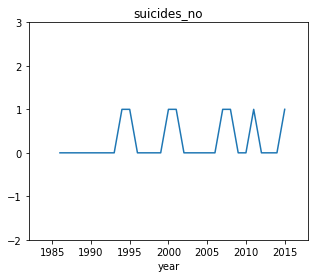

Men range 15-24 year Guatemala 's suicides_no


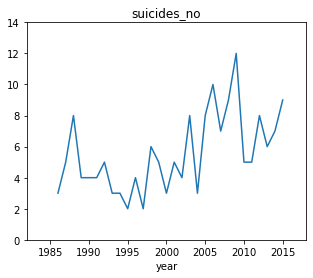

Men range 15-24 year Norway 's suicides_no


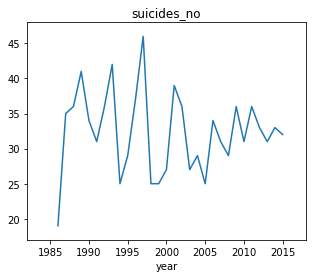

Men range 15-24 year Saint Lucia 's suicides_no


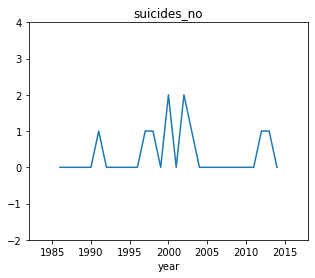

Men range 15-24 year Finland 's suicides_no


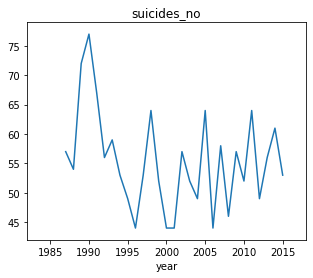

Men range 15-24 year Sweden 's suicides_no


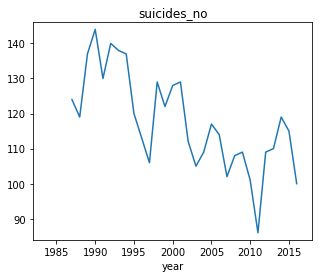

Men range 15-24 year Guyana 's suicides_no


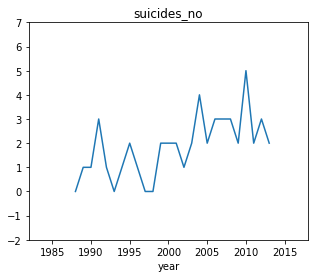

Men range 15-24 year Ukraine 's suicides_no


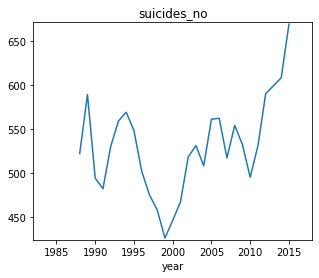

Men range 15-24 year Romania 's suicides_no


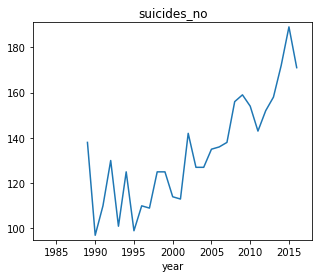

Men range 15-24 year Russian Federation 's suicides_no


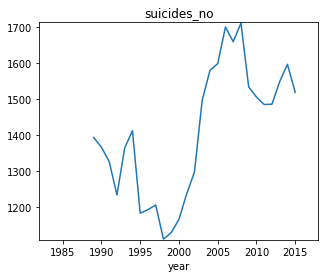

Men range 15-24 year Armenia 's suicides_no


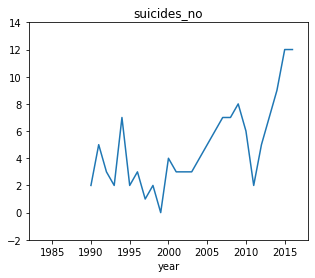

Men range 15-24 year Czech Republic 's suicides_no


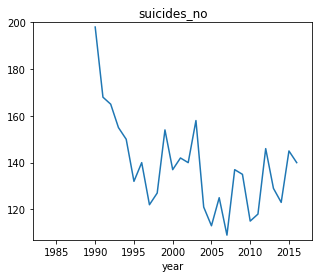

Men range 15-24 year Germany 's suicides_no


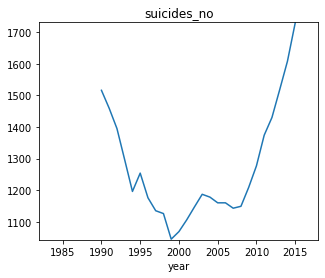

Men range 15-24 year Kazakhstan 's suicides_no


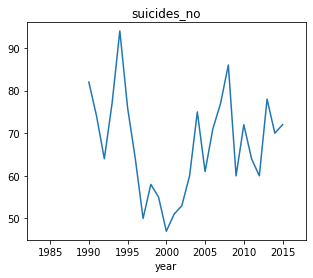

Men range 15-24 year Kyrgyzstan 's suicides_no


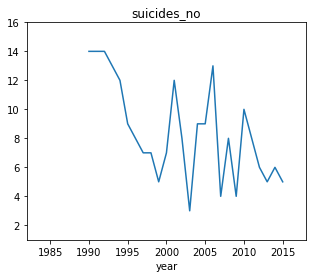

Men range 15-24 year Hungary 's suicides_no


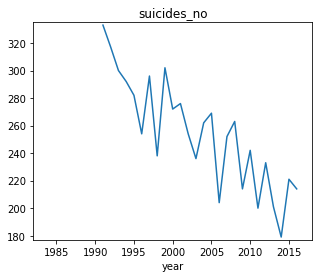

In [ ]:
# For male
for s in country:
    for t in targets:
      print("Men range 15-24 year", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = male_df[male_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(male_df[male_df["country"] == s][t].min()-2,male_df[male_df["country"] == s][t].max()+2)
      plt.show()


Women  Argentina 's suicides_no


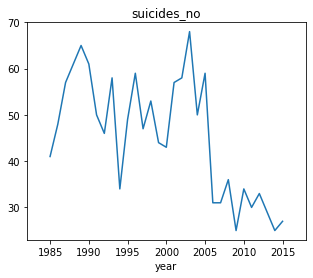

Women  Australia 's suicides_no


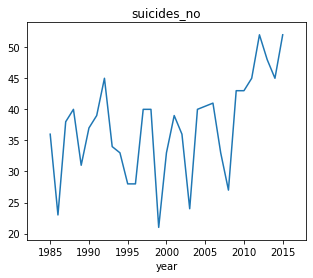

Women  Austria 's suicides_no


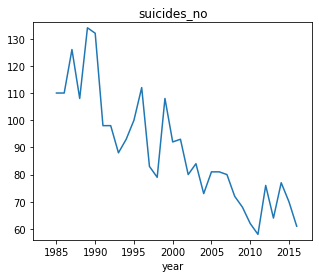

Women  Barbados 's suicides_no


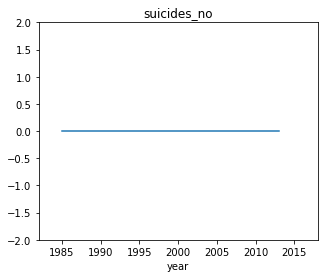

Women  Belgium 's suicides_no


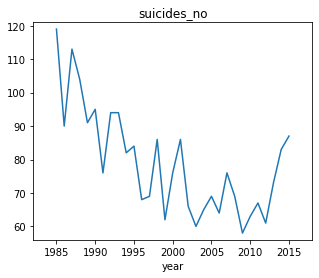

Women  Brazil 's suicides_no


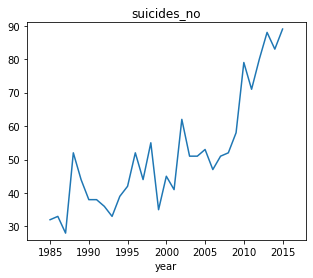

Women  Bulgaria 's suicides_no


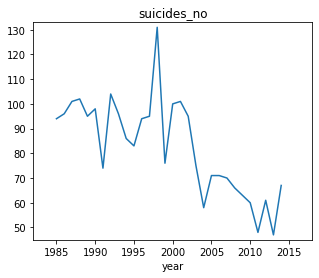

Women  Canada 's suicides_no


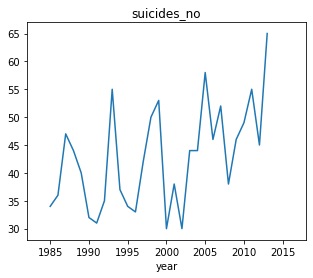

Women  Chile 's suicides_no


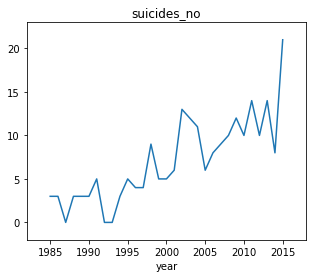

Women  Colombia 's suicides_no


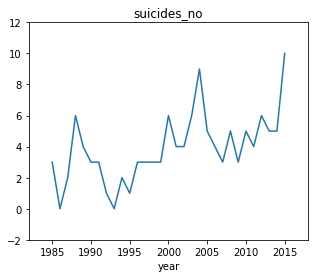

Women  Costa Rica 's suicides_no


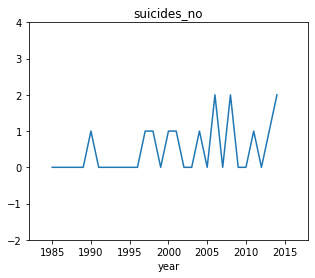

Women  Ecuador 's suicides_no


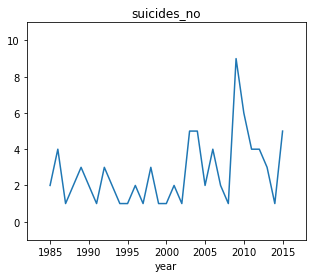

Women  France 's suicides_no


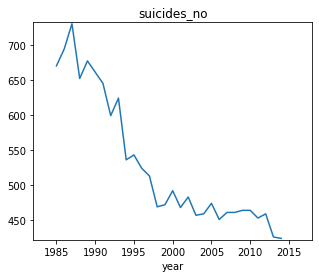

Women  Greece 's suicides_no


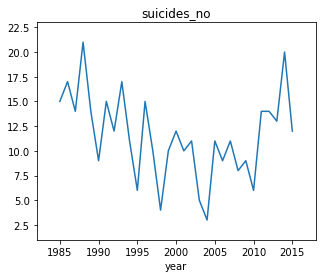

Women  Grenada 's suicides_no


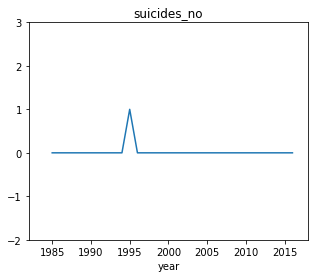

Women  Iceland 's suicides_no


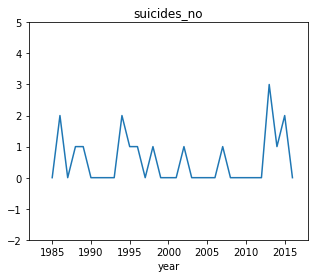

Women  Ireland 's suicides_no


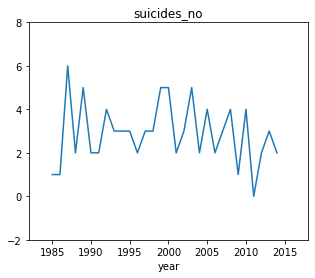

Women  Israel 's suicides_no


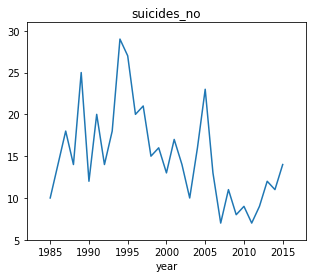

Women  Italy 's suicides_no


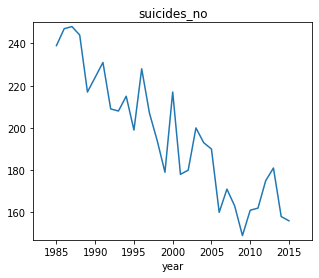

Women  Japan 's suicides_no


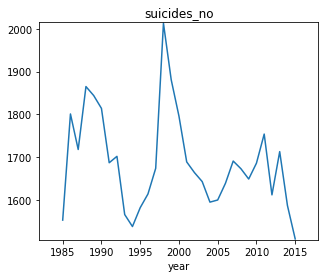

Women  Kuwait 's suicides_no


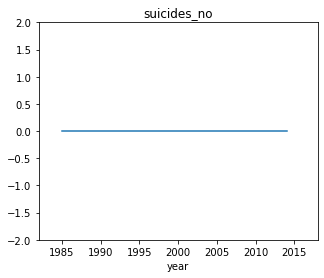

Women  Luxembourg 's suicides_no


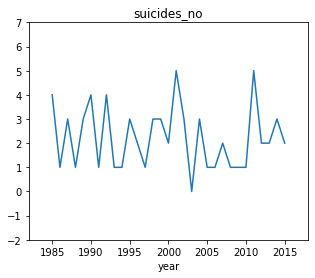

Women  Malta 's suicides_no


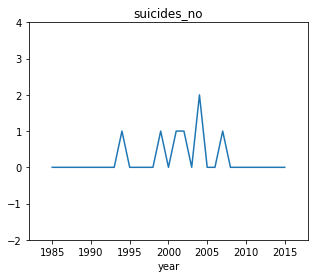

Women  Mauritius 's suicides_no


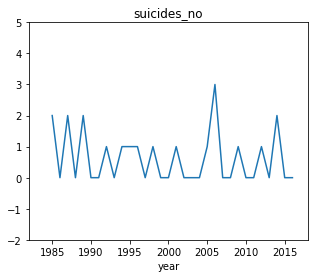

Women  Mexico 's suicides_no


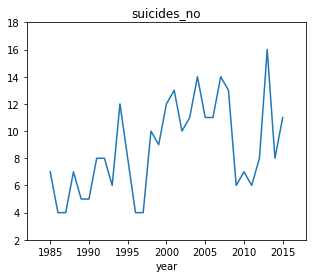

Women  Netherlands 's suicides_no


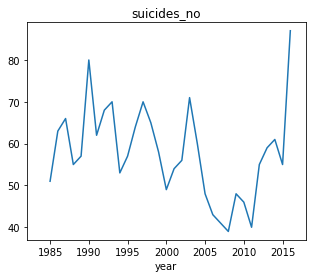

Women  New Zealand 's suicides_no


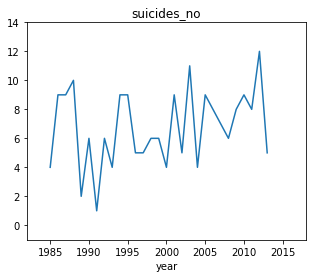

Women  Panama 's suicides_no


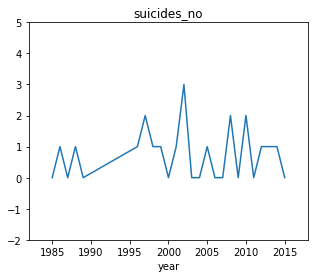

Women  Paraguay 's suicides_no


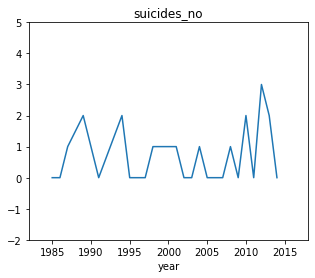

Women  Portugal 's suicides_no


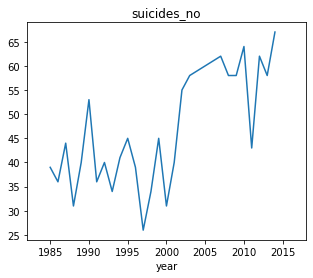

Women  Puerto Rico 's suicides_no


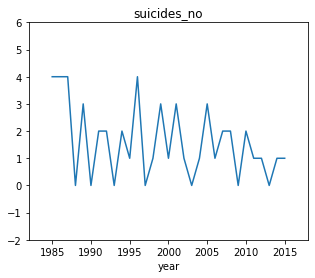

Women  Republic of Korea 's suicides_no


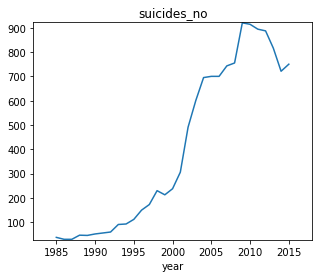

Women  Saint Vincent and Grenadines 's suicides_no


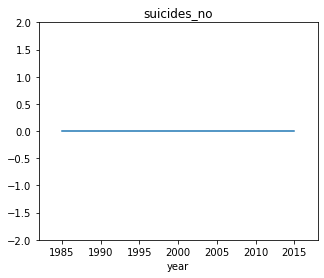

Women  Singapore 's suicides_no


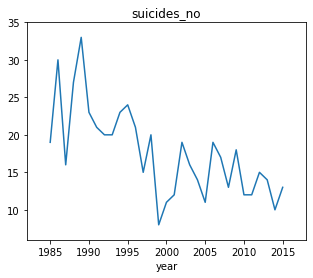

Women  Spain 's suicides_no


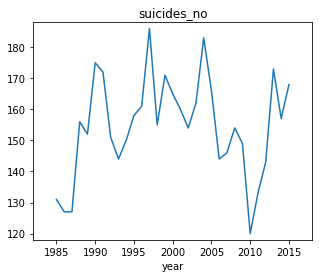

Women  Suriname 's suicides_no


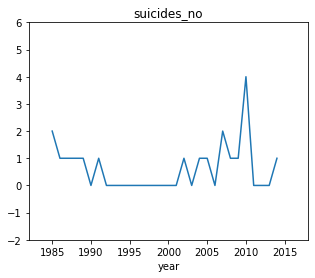

Women  Thailand 's suicides_no


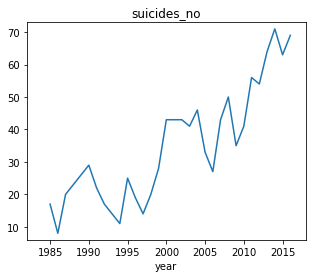

Women  Trinidad and Tobago 's suicides_no


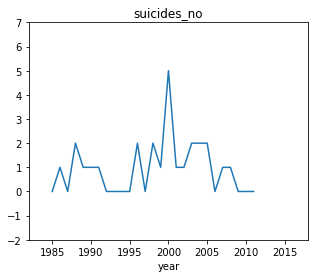

Women  United Kingdom 's suicides_no


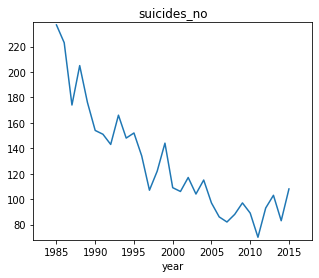

Women  United States 's suicides_no


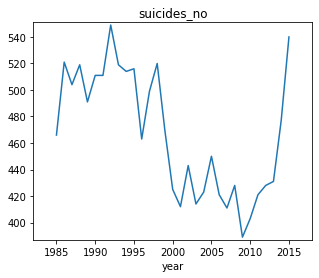

Women  Uruguay 's suicides_no


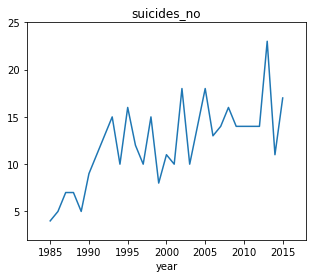

Women  Belize 's suicides_no


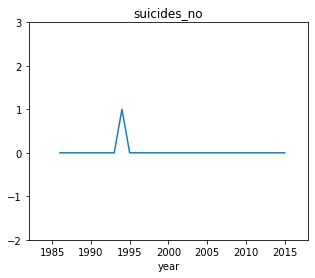

Women  Guatemala 's suicides_no


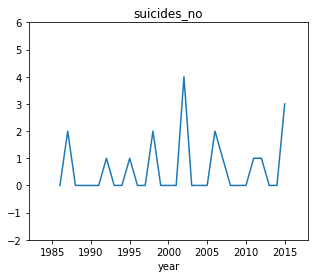

Women  Norway 's suicides_no


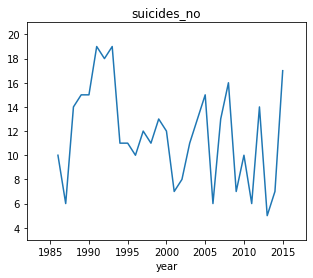

Women  Saint Lucia 's suicides_no


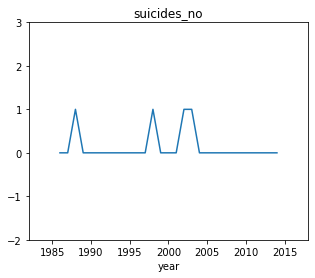

Women  Finland 's suicides_no


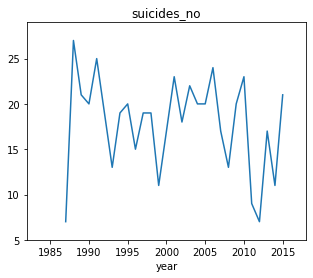

Women  Sweden 's suicides_no


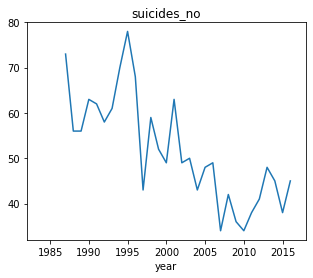

Women  Guyana 's suicides_no


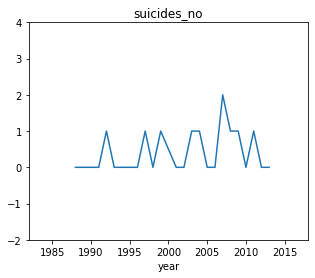

Women  Ukraine 's suicides_no


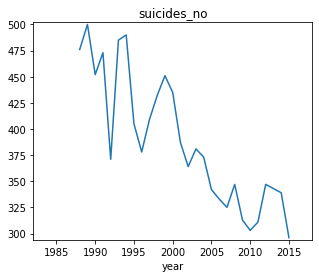

Women  Romania 's suicides_no


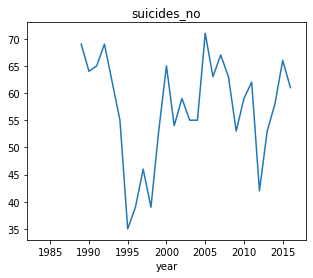

Women  Russian Federation 's suicides_no


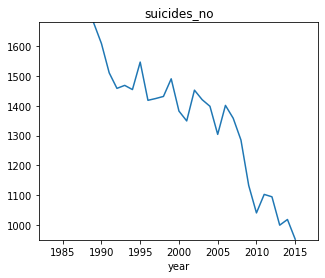

Women  Armenia 's suicides_no


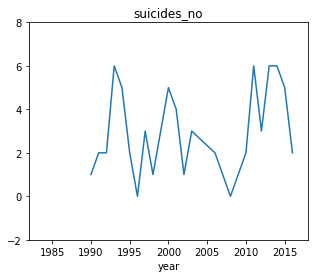

Women  Czech Republic 's suicides_no


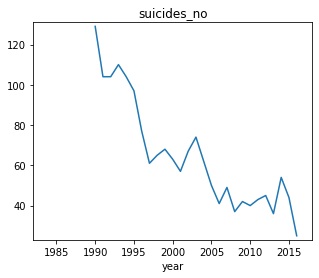

Women  Germany 's suicides_no


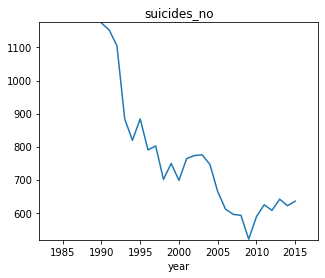

Women  Kazakhstan 's suicides_no


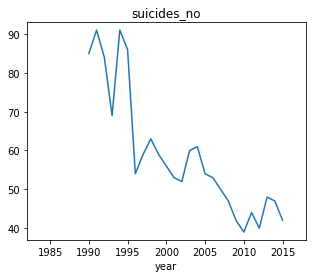

Women  Kyrgyzstan 's suicides_no


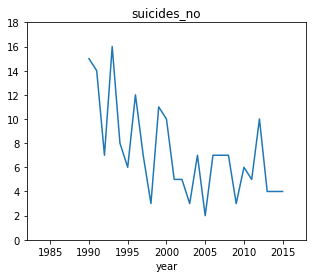

Women  Hungary 's suicides_no


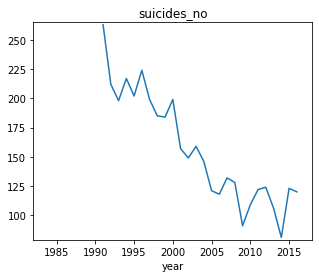

In [ ]:
# For female
for s in fecountry:

    for t in fetargets:
      print("Women ", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = female_df[female_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(female_df[female_df["country"] == s][t].min()-2,female_df[female_df["country"] == s][t].max()+2)
      plt.show()
     

### 1 B. Plot the suicide time series for all countries.

In [ ]:
pivot_test = male_df.pivot_table(index = "year",columns="country", values=targets)
pivot_test_fem = female_df.pivot_table(index = "year", columns = "country", values = targets)

pivot_test_fem

suicides_no                    ...                                     
country   Argentina Armenia Australia  ... United Kingdom United States Uruguay
year                                   ...                                     
1985           41.0     NaN      36.0  ...          237.0         466.0     4.0
1986           48.0     NaN      23.0  ...          223.0         521.0     5.0
1987           57.0     NaN      38.0  ...          174.0         504.0     7.0
1988           61.0     NaN      40.0  ...          205.0         519.0     7.0
1989           65.0     NaN      31.0  ...          176.0         491.0     5.0
1990           61.0     1.0      37.0  ...          154.0         511.0     9.0
1991           50.0     2.0      39.0  ...          151.0         511.0     NaN
1992           46.0     2.0      45.0  ...          143.0         549.0     NaN
1993           58.0     6.0      34.0  ...          166.0         519.0    15.0
1994           34.0     5.0      33.0  ...          148.0         514.0    10.0
1995           49.0     2.0      28.0  ...          152.0         516.0    16.0
1996           59.0     0.0      28.0  ...          134.0         463.0    12.0
1997           47.0     3.0      40.0  ...          107.0         499.0    10.0
1998           53.0     1.0      40.0  ...          122.0         520.0    15.0
1999           44.0     3.0      21.0  ...          144.0         469.0     8.0
2000           43.0     5.0      33.0  ...          109.0         425.0    11.0
2001           57.0     4.0      39.0  ...          106.0         412.0    10.0
2002           58.0     1.0      36.0  ...          117.0         443.0    18.0
2003           68.0     3.0      24.0  ...          104.0         414.0    10.0
2004           50.0     NaN      40.0  ...          115.0         423.0    14.0
2005           59.0     NaN       NaN  ...           97.0         450.0    18.0
2006           31.0     2.0      41.0  ...           86.0         421.0    13.0
2007           31.0     1.0      33.0  ...           82.0         411.0    14.0
2008           36.0     0.0      27.0  ...           88.0         428.0    16.0
2009           25.0     1.0      43.0  ...           97.0         389.0    14.0
2010           34.0     2.0      43.0  ...           89.0         403.0    14.0
2011           30.0     6.0      45.0  ...           70.0         421.0     NaN
2012           33.0     3.0      52.0  ...           93.0         428.0    14.0
2013           29.0     6.0      48.0  ...          103.0         431.0    23.0
2014           25.0     6.0      45.0  ...           83.0         477.0    11.0
2015           27.0     5.0      52.0  ...          108.0         540.0    17.0
2016            NaN     2.0       NaN  ...            NaN           NaN     NaN

[32 rows x 57 columns]

In [ ]:
timeSeriesRes = pivot_test["suicides_no"]

inter_ts = timeSeriesRes.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts = inter_ts.interpolate(method = 'pad',axis =0)
#female
timeSeriesRes_fem = pivot_test_fem["suicides_no"]

inter_ts_fem = timeSeriesRes_fem.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts_fem = inter_ts_fem.interpolate(method = 'pad',axis =0)

In [ ]:
inter_ts

country  Argentina  Armenia  Australia  ...  United Kingdom  United States  Uruguay
year                                    ...                                        
1985         202.0      2.0       67.0  ...           264.0         2177.0     37.0
1986         230.0      2.0       89.0  ...           280.0         2340.0     38.0
1987         200.0      2.0      111.0  ...           248.0         2532.0     36.0
1988         216.0      2.0       93.0  ...           313.0         2548.0     33.0
1989         208.0      2.0       91.0  ...           267.0         2462.0     37.0
1990         226.0      2.0       87.0  ...           264.0         2653.0     37.0
1991         184.0      5.0      114.0  ...           238.0         2673.0     39.0
1992         194.0      3.0       87.0  ...           216.0         2573.0     41.0
1993         229.0      2.0       95.0  ...           221.0         2649.0     43.0
1994         192.0      7.0      100.0  ...           218.0         2629.0     42.0
1995         190.0      2.0       88.0  ...           222.0         2580.0     52.0
1996         189.0      3.0      122.0  ...           218.0         2586.0     29.0
1997         195.0      1.0      123.0  ...           252.0         2566.0     49.0
1998         201.0      2.0       96.0  ...           204.0         2686.0     56.0
1999         204.0      0.0      119.0  ...           242.0         2549.0     66.0
2000         232.0      4.0      115.0  ...           223.0         2589.0     61.0
2001         250.0      3.0      115.0  ...           225.0         2549.0     51.0
2002         234.0      3.0      101.0  ...           175.0         2642.0     78.0
2003         272.0      3.0      103.0  ...           209.0         2499.0     62.0
2004         227.0      4.0      126.0  ...           221.0         2496.0     67.0
2005         225.0      5.0      120.0  ...           215.0         2610.0     55.0
2006         246.0      6.0      114.0  ...           199.0         2494.0     59.0
2007         225.0      7.0      124.0  ...           214.0         2566.0     64.0
2008         208.0      7.0      121.0  ...           221.0         2531.0     53.0
2009         177.0      8.0      135.0  ...           195.0         2552.0     59.0
2010         206.0      6.0      151.0  ...           227.0         2617.0     67.0
2011         178.0      2.0      146.0  ...           207.0         2721.0     66.0
2012         225.0      5.0      158.0  ...           215.0         2853.0     65.0
2013         168.0      7.0      160.0  ...           258.0         2990.0     63.0
2014         192.0      9.0      164.0  ...           257.0         3106.0     55.0
2015         245.0     12.0      181.0  ...           273.0         3171.0     58.0
2016         245.0     12.0      181.0  ...           273.0         3171.0     58.0

[32 rows x 57 columns]

In [ ]:
inter_ts_fem

country  Argentina   Armenia  Australia  ...  United Kingdom  United States  Uruguay
year                                     ...                                        
1985          41.0  1.000000       36.0  ...           237.0          466.0      4.0
1986          48.0  1.000000       23.0  ...           223.0          521.0      5.0
1987          57.0  1.000000       38.0  ...           174.0          504.0      7.0
1988          61.0  1.000000       40.0  ...           205.0          519.0      7.0
1989          65.0  1.000000       31.0  ...           176.0          491.0      5.0
1990          61.0  1.000000       37.0  ...           154.0          511.0      9.0
1991          50.0  2.000000       39.0  ...           151.0          511.0     11.0
1992          46.0  2.000000       45.0  ...           143.0          549.0     13.0
1993          58.0  6.000000       34.0  ...           166.0          519.0     15.0
1994          34.0  5.000000       33.0  ...           148.0          514.0     10.0
1995          49.0  2.000000       28.0  ...           152.0          516.0     16.0
1996          59.0  0.000000       28.0  ...           134.0          463.0     12.0
1997          47.0  3.000000       40.0  ...           107.0          499.0     10.0
1998          53.0  1.000000       40.0  ...           122.0          520.0     15.0
1999          44.0  3.000000       21.0  ...           144.0          469.0      8.0
2000          43.0  5.000000       33.0  ...           109.0          425.0     11.0
2001          57.0  4.000000       39.0  ...           106.0          412.0     10.0
2002          58.0  1.000000       36.0  ...           117.0          443.0     18.0
2003          68.0  3.000000       24.0  ...           104.0          414.0     10.0
2004          50.0  2.666667       40.0  ...           115.0          423.0     14.0
2005          59.0  2.333333       40.5  ...            97.0          450.0     18.0
2006          31.0  2.000000       41.0  ...            86.0          421.0     13.0
2007          31.0  1.000000       33.0  ...            82.0          411.0     14.0
2008          36.0  0.000000       27.0  ...            88.0          428.0     16.0
2009          25.0  1.000000       43.0  ...            97.0          389.0     14.0
2010          34.0  2.000000       43.0  ...            89.0          403.0     14.0
2011          30.0  6.000000       45.0  ...            70.0          421.0     14.0
2012          33.0  3.000000       52.0  ...            93.0          428.0     14.0
2013          29.0  6.000000       48.0  ...           103.0          431.0     23.0
2014          25.0  6.000000       45.0  ...            83.0          477.0     11.0
2015          27.0  5.000000       52.0  ...           108.0          540.0     17.0
2016          27.0  2.000000       52.0  ...           108.0          540.0     17.0

[32 rows x 57 columns]

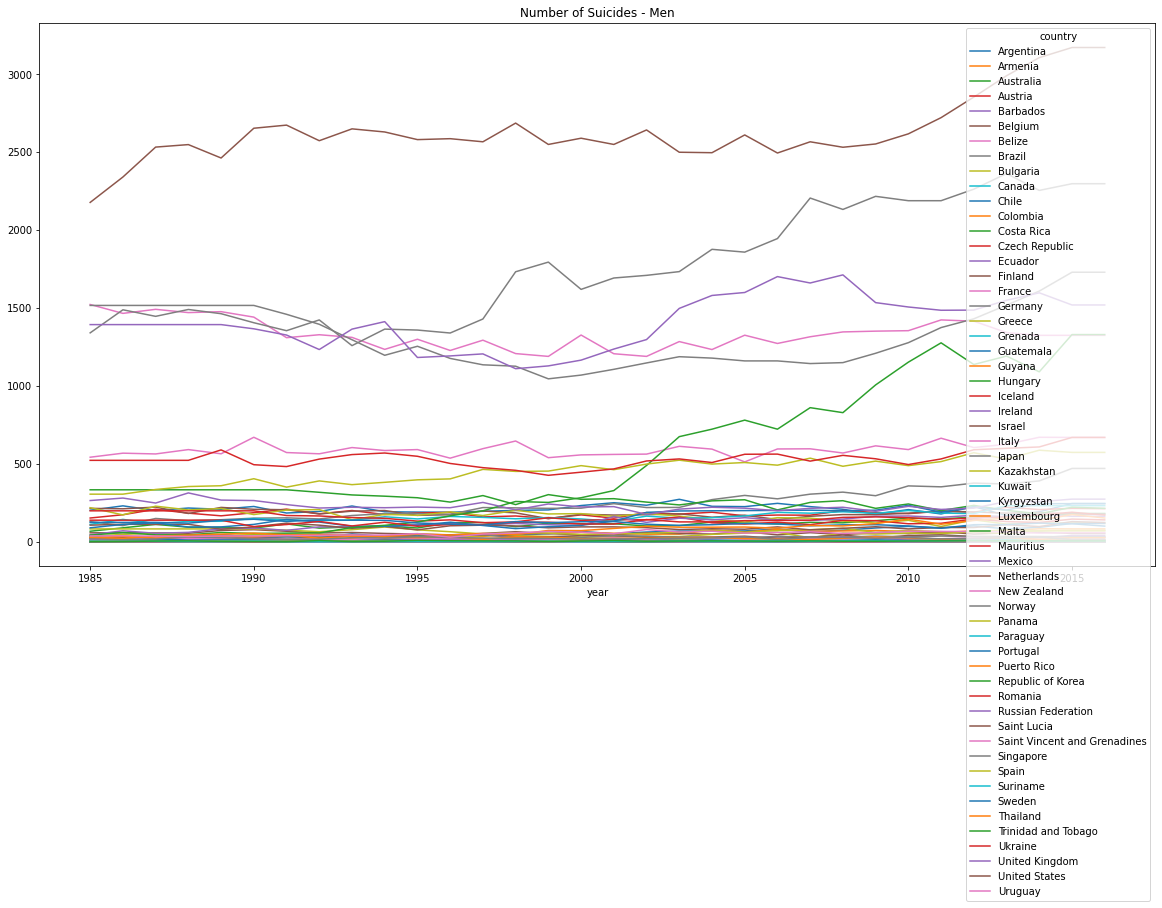

In [ ]:
inter_ts.plot(figsize = (20,10), title = "Number of Suicides - Men")

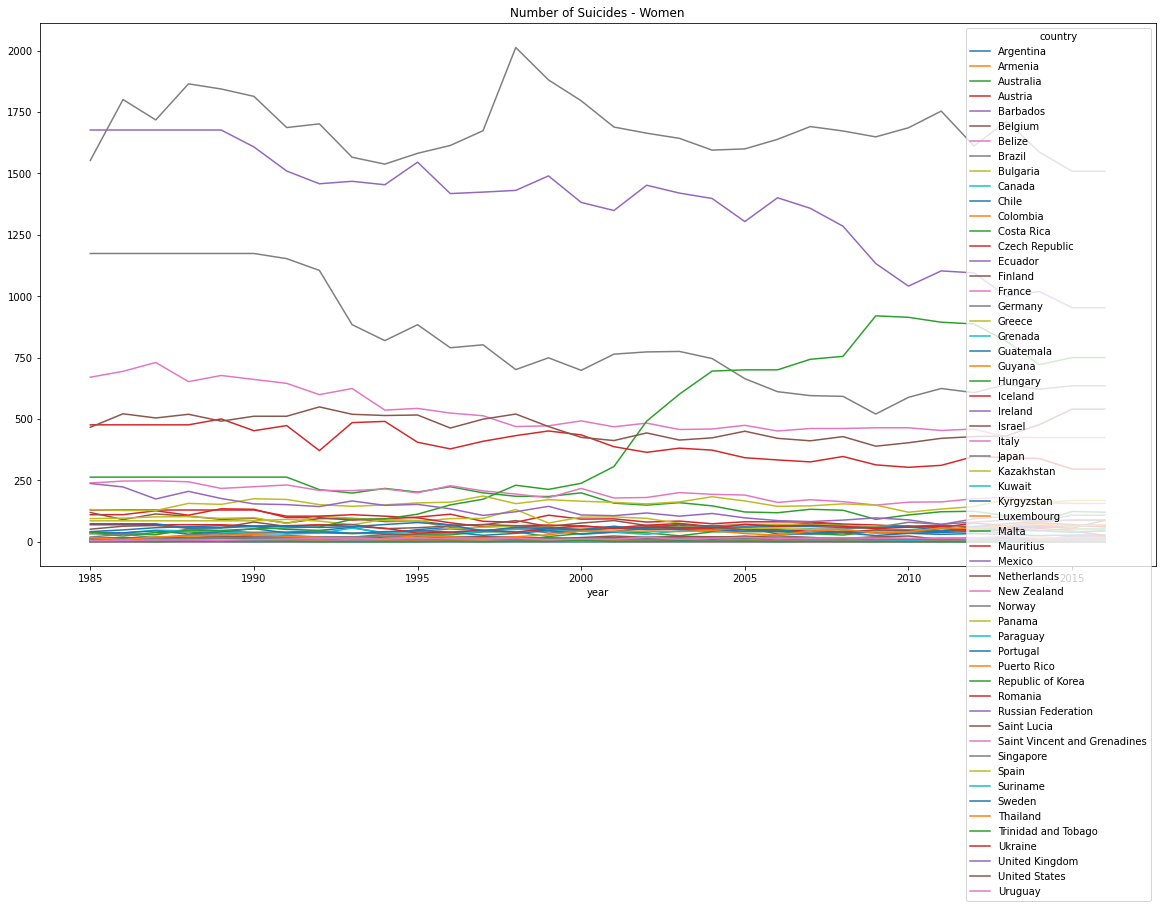

In [ ]:
inter_ts_fem.plot(figsize = (20,10), title = "Number of Suicides - Women")

## 2. Apply Hierarchical Clustering in order to identify those countries with similar behaviors in the time series.

### 2 A. method Ward with Euclidean distance



In [ ]:
Z = hac.linkage(inter_ts.T, method='ward', metric='euclidean')
Z_f = hac.linkage(inter_ts_fem.T, method='ward', metric='euclidean')

In [ ]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    print(results)

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
        plt.show()


[ 6  4  5  5  4  5  4  6  5  5  3  3  4  5  4  3  7  7  3  4  4  4  6  4
  4  4  1  9  3  4  4  4  4  4  5  5  4  4  4  4  5  4  2  5  8  4  4  4
  1  4  5  3  4  1  6 10  3]
Cluster 6 number of entries 4


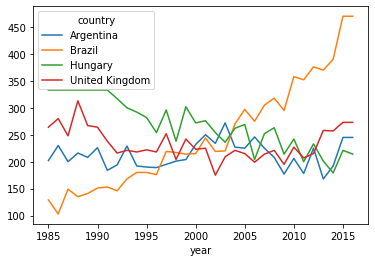

Cluster 4 number of entries 26


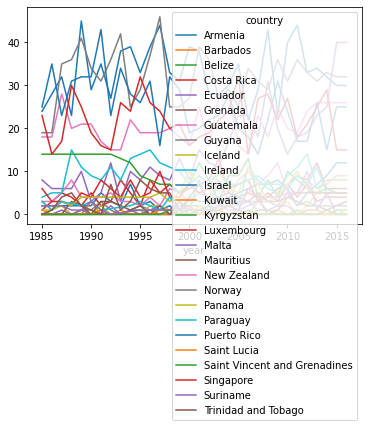

Cluster 5 number of entries 11


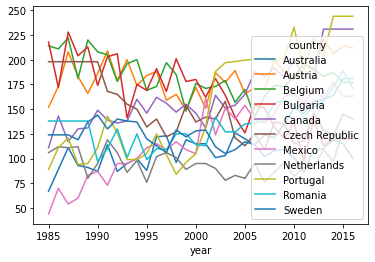

Cluster 3 number of entries 7


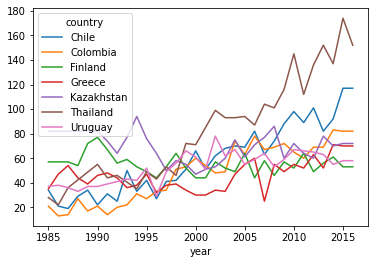

Cluster 7 number of entries 2


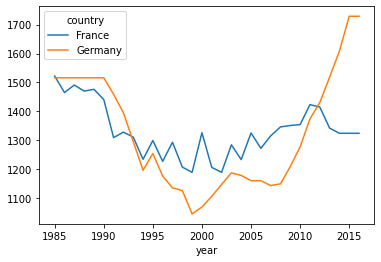

Cluster 1 number of entries 3


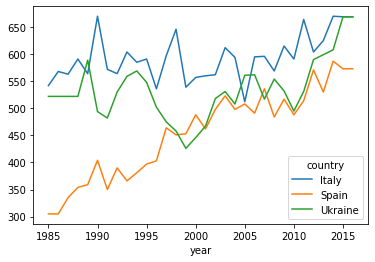

Cluster 9 number of entries 1


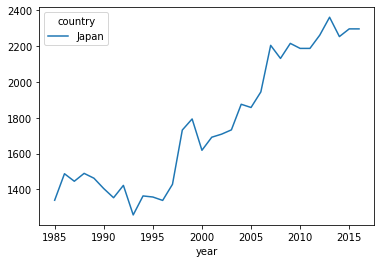

Cluster 2 number of entries 1


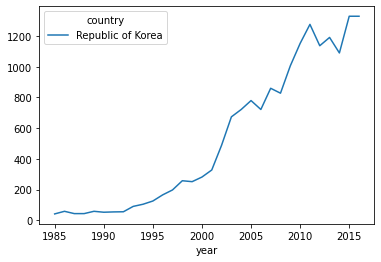

Cluster 8 number of entries 1


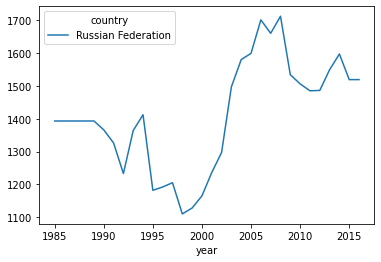

Cluster 10 number of entries 1


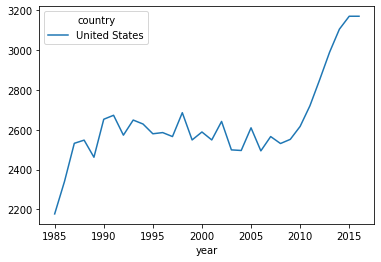

In [ ]:
print_clusters(inter_ts.T, Z, 10, True)

[ 5  4  5  5  4  5  4  5  5  5  4  4  4  5  4  4  6  9  4  4  4  4  3  4
  4  4  3  1  5  4  4  4  4  4  4  5  4  4  4  4  5  4 10  5  2  4  4  4
  3  4  5  5  4  8  3  7  4]
Cluster 5 number of entries 14


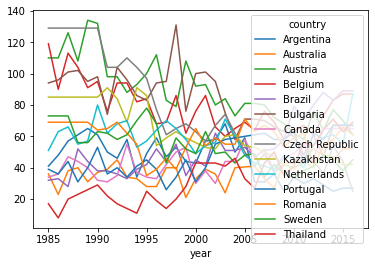

Cluster 4 number of entries 32


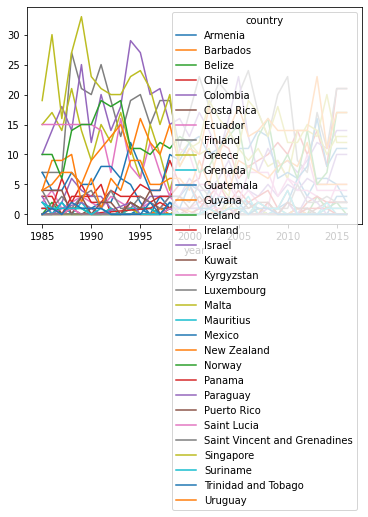

Cluster 6 number of entries 1


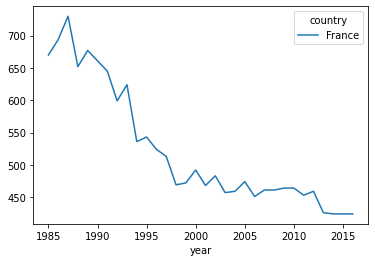

Cluster 9 number of entries 1


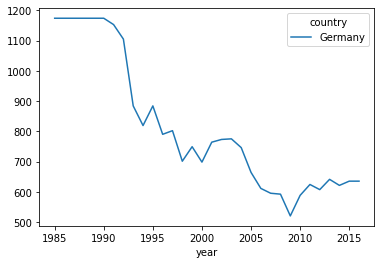

Cluster 3 number of entries 4


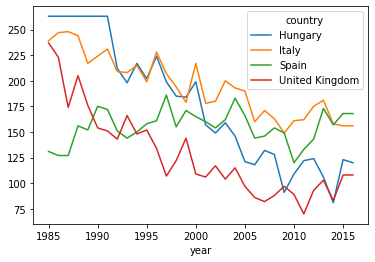

Cluster 1 number of entries 1


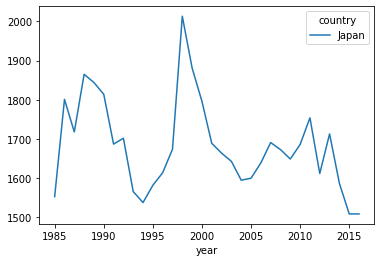

Cluster 10 number of entries 1


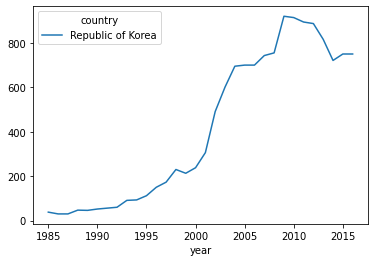

Cluster 2 number of entries 1


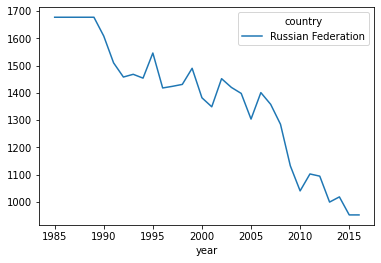

Cluster 8 number of entries 1


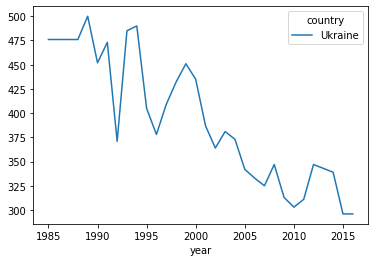

Cluster 7 number of entries 1


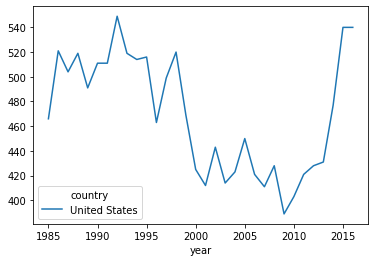

In [ ]:
print_clusters(inter_ts_fem.T, Z_f, 10, True)

### 2 B. Plot the dendrogram

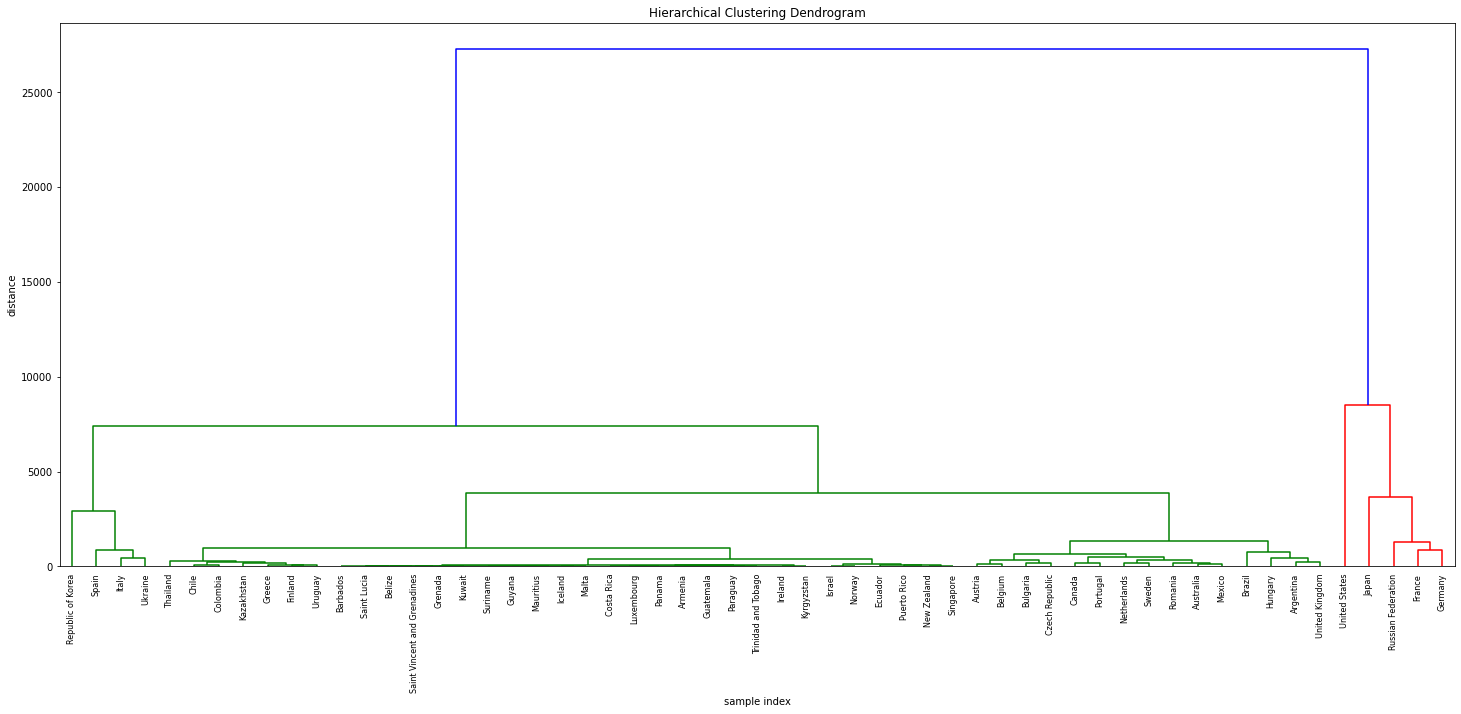

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

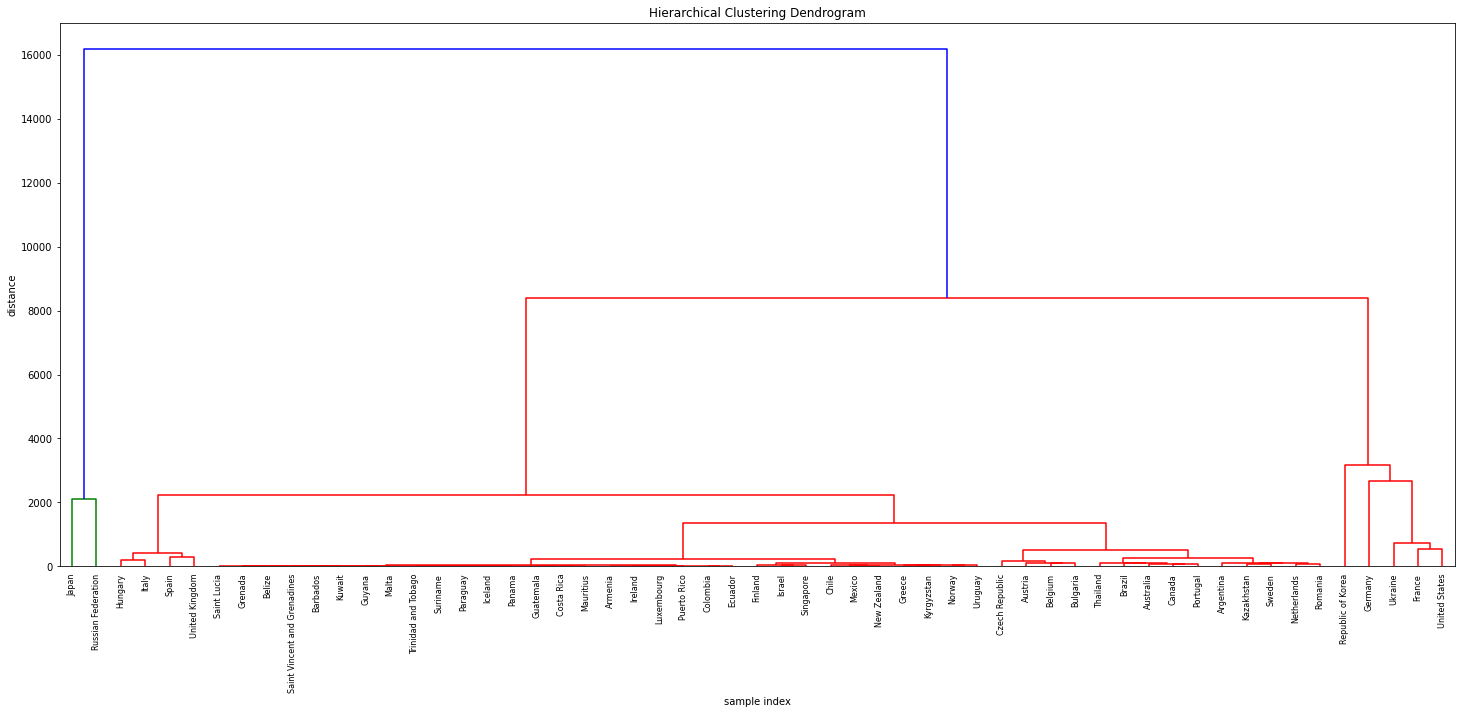

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
# Here we use dtw as distance metric
def dtw(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance
Z3 = hac.linkage(inter_ts.T, method='single', metric=dtw)
Z3_f = hac.linkage(inter_ts_fem.T, method='single', metric=dtw)


### 2 E. Plot the 3 dendrograms: single, DTW


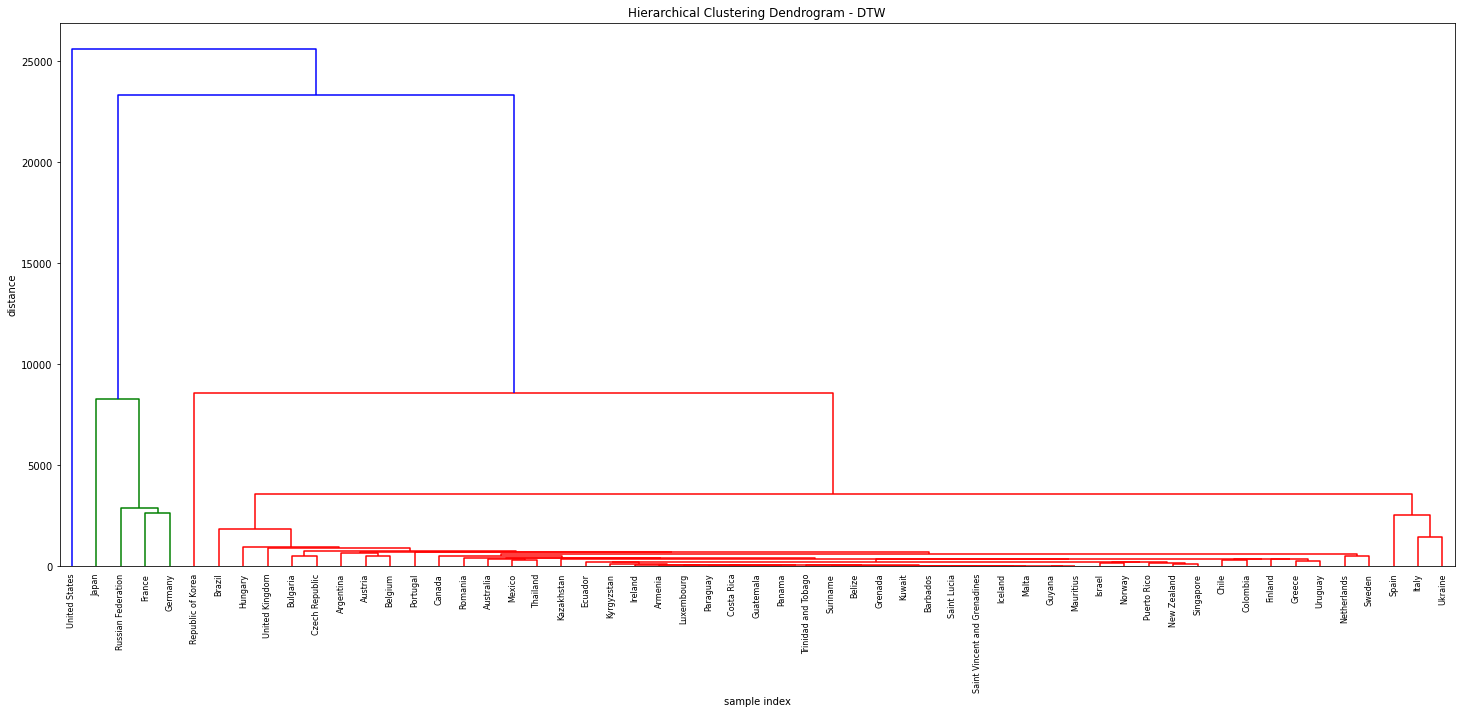

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

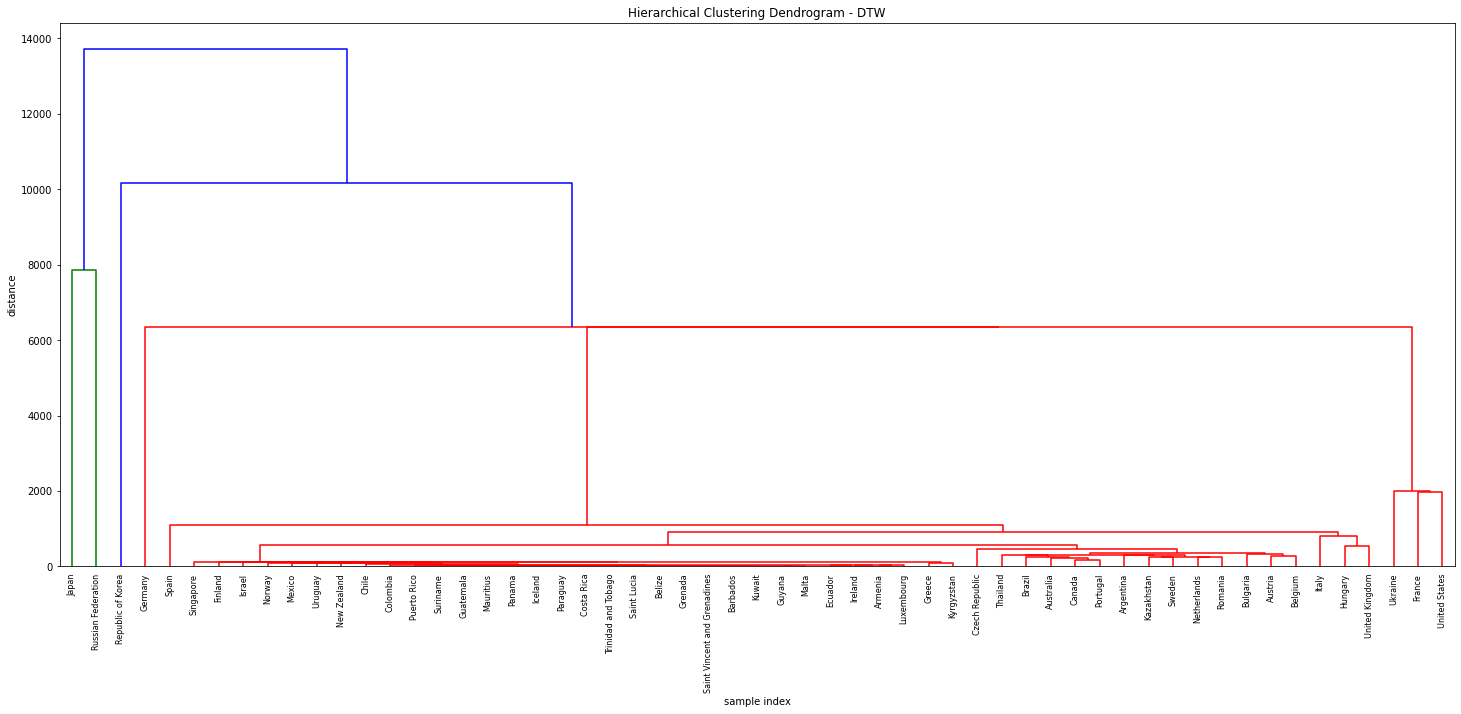

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### For the case of simple-DTW:


[ 5  5  5  5  5  5  5  6  5  5  5  5  5  5  5  5  1  2  5  5  5  5  5  5
  5  5  7  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  9  5  3  5  5  5
  8  5  5  5  5  7  5 10  5]
Cluster 5 number of entries 47


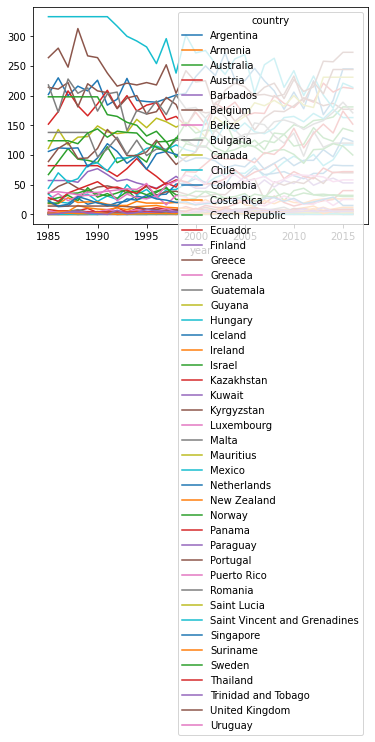

Cluster 6 number of entries 1


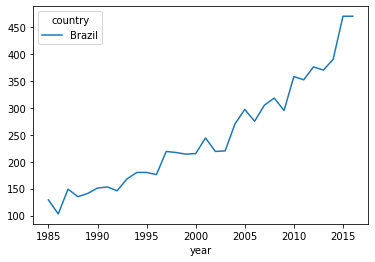

Cluster 1 number of entries 1


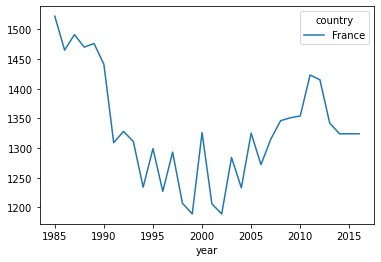

Cluster 2 number of entries 1


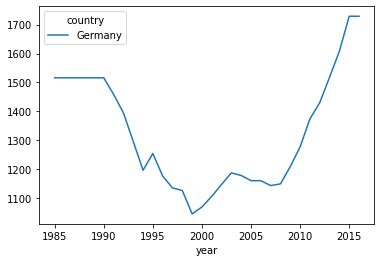

Cluster 7 number of entries 2


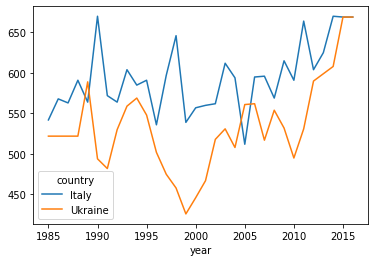

Cluster 4 number of entries 1


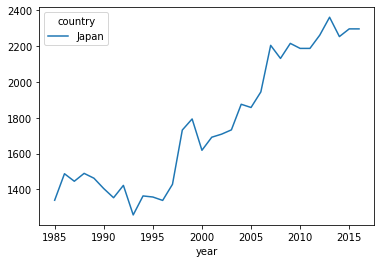

Cluster 9 number of entries 1


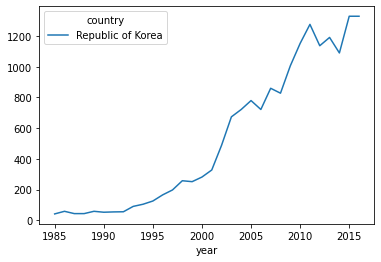

Cluster 3 number of entries 1


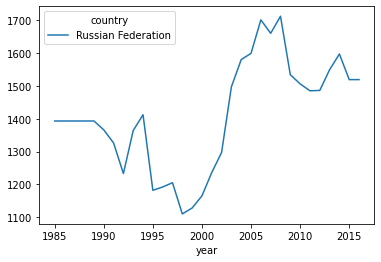

Cluster 8 number of entries 1


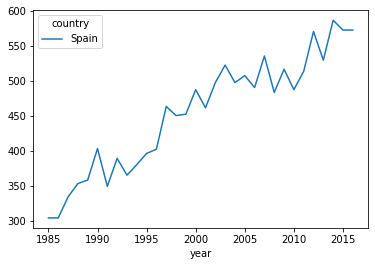

Cluster 10 number of entries 1


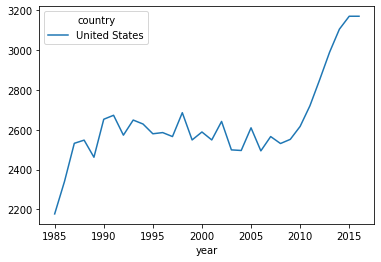

In [ ]:
print_clusters(inter_ts.T, Z3, 10, True)

[ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  6  9  3  3  3  3  4  3
  3  3  4  1  3  3  3  3  3  3  3  3  3  3  3  3  3  3 10  3  2  3  3  3
  5  3  3  3  3  8  4  7  3]
Cluster 3 number of entries 46


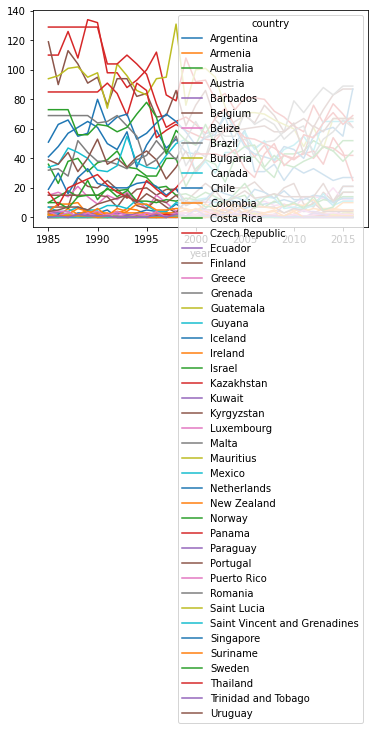

Cluster 6 number of entries 1


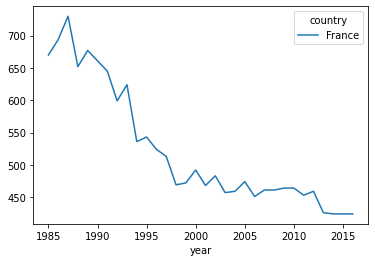

Cluster 9 number of entries 1


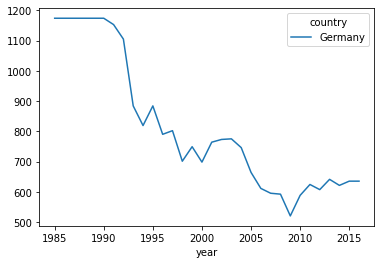

Cluster 4 number of entries 3


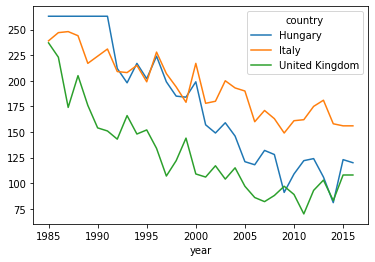

Cluster 1 number of entries 1


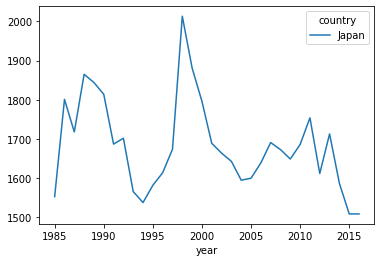

Cluster 10 number of entries 1


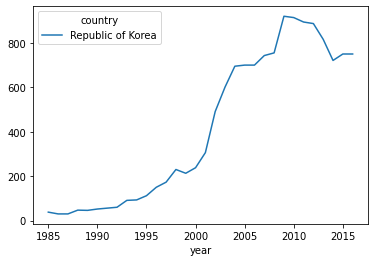

Cluster 2 number of entries 1


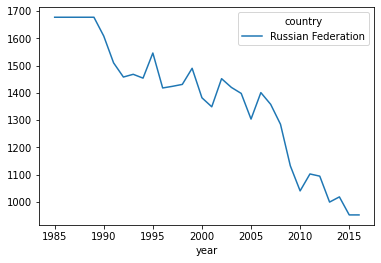

Cluster 5 number of entries 1


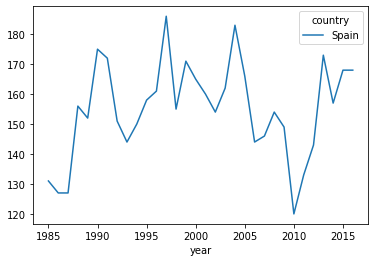

Cluster 8 number of entries 1


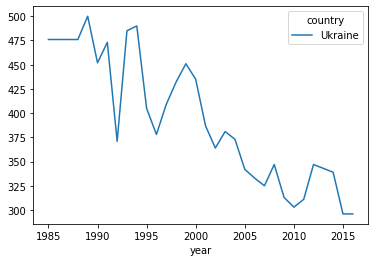

Cluster 7 number of entries 1


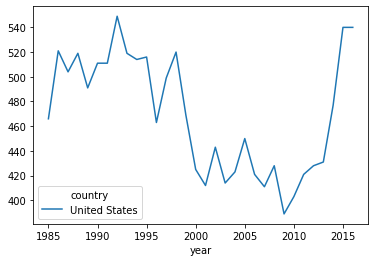

In [ ]:
print_clusters(inter_ts_fem.T, Z3_f, 10, True)